# TickVault Python API Example Usage
---
Make sure to have registered and generated an API key on https://nasdaq-cx.ticksmith.com before starting this example. 

In the following code block, replace <span style="color:blue"> &lt;USER_NAME&gt; </span> with the email you signed up with (within quotes) and <span style="color:blue"> &lt;API_KEY&gt; </span> with the API key you generated (also within quotes).
Then, to see what data you have access to, call the 'datasets' method:

In [1]:
from tickvaultpythonapi.nasdaqcxclient import NasdaqCxClient

nasdaq = NasdaqCxClient(user_name="<USER_NAME>", 
                        secret_key="<API_KEY>")

nasdaq.datasets()

['cx_eod_stats', 'cx_hits', 'cx_rollup_1000', 'cx_rollup_60000']

To see what columns exist in that dataset and filter by, call the 'describe' method on a dataset from above:

In [2]:
nasdaq.describe('cx_hits')

{'ask_size': 'INT',
 'askprice': 'DECIMAL',
 'bid_size': 'INT',
 'bidprice': 'DECIMAL',
 'buyerid': 'STRING',
 'crosstype': 'STRING',
 'day': 'STRING',
 'execution_venue': 'STRING',
 'halted': 'STRING',
 'lastprice': 'DECIMAL',
 'line_type': 'STRING',
 'linenumber': 'BIGINT',
 'listing_market': 'STRING',
 'sellerid': 'STRING',
 'short_exempt': 'STRING',
 'source': 'STRING',
 'ticker': 'STRING',
 'trade_attribute': 'STRING',
 'trade_initiator_side': 'STRING',
 'traderef': 'STRING',
 'ts': 'BIGINT',
 'volume': 'BIGINT',
 'yyyymmdd': 'STRING'}

To access the bid and ask prices for TD quotes when the ask and bid sizes were greater than 10, we will query the HiTS dataset (and print its length to make sure we got results):

In [6]:
result = nasdaq.query_hits(source="CHIX", tickers="TD",
        fields="ts,askprice,bidprice", start_time=20150302093000, end_time=20150302160000,
        predicates="ask_size > 10 and bid_size > 10 and line_type like Q",
        limit=1000000)

str(len(result))

'126990'

Let's convert the result to a pandas DataFrame for analytics:

In [7]:
df = nasdaq.as_dataframe(result) 

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126990 entries, 2015-03-02 09:30:00.004000 to 2015-03-02 15:59:59.940000
Data columns (total 2 columns):
askprice    126990 non-null float64
bidprice    126990 non-null float64
dtypes: float64(2)
memory usage: 2.9 MB


Now to visualise the result:

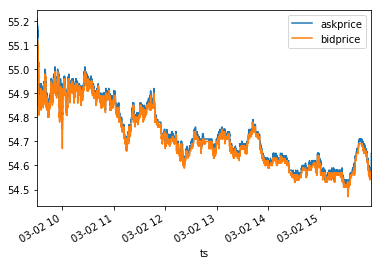

In [8]:
%matplotlib inline

df.plot()